In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spammsg/spambase.DOCUMENTATION
/kaggle/input/spammsg/spambase.data
/kaggle/input/spammsg/spambase.names
/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
x = np.array([5.1,4.9,4.7,4.6,5,5.4,4.6])
y = np.array([3.5,3,3.2,3.1,3.6,3.9,3.4])

In [3]:
import matplotlib.pyplot as plt

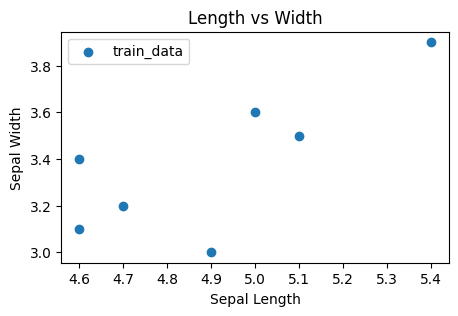

In [4]:
plt.figure(figsize=(5,3))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Length vs Width')
plt.scatter(x,y)
plt.legend(['train_data'])
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape(-1,1)
model.fit(x,y)

LinearRegression()

In [6]:
predicted_value = model.predict(x)

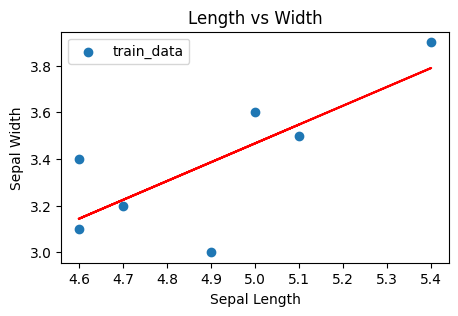

In [7]:
plt.figure(figsize=(5,3))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Length vs Width')
plt.scatter(x,y)
plt.plot(x,predicted_value,color='red')
plt.legend(['train_data'])
plt.show()

In [8]:
model.intercept_

-0.5719780219780177

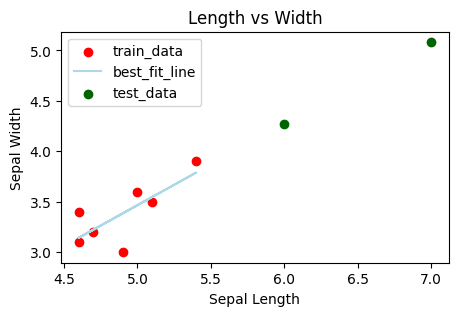

In [9]:
plt.figure(figsize=(5,3))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Length vs Width')
plt.scatter(x,y,color='red')
plt.plot(x,predicted_value,color='lightblue')
x_test = np.array([6,7])
plt.scatter(x_test,model.predict(x_test.reshape(-1,1)),color='darkgreen')
plt.legend(['train_data','best_fit_line','test_data'])
plt.show()

In [10]:
path = '/kaggle/input/iris/Iris.csv'
df = pd.read_csv(path)

In [11]:
df.shape

(150, 6)

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

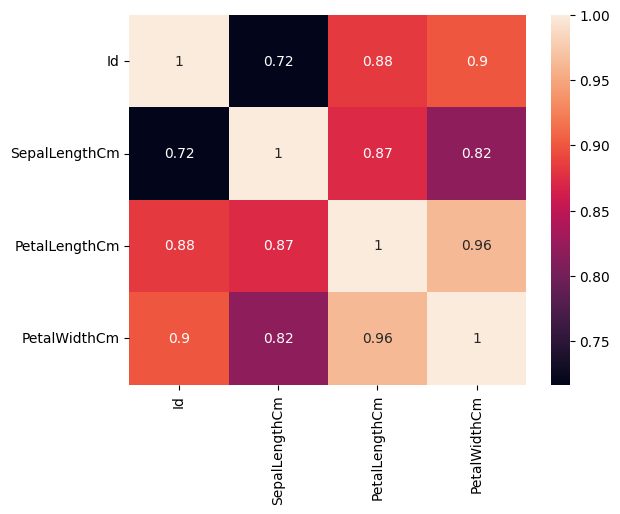

In [15]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df = df.drop(columns=['SepalWidthCm', 'Species'])
sns.heatmap(df.corr(), annot=True)


In [16]:
print('Training Size =',0.80*150)

Training Size = 120.0


In [17]:
x_train = x[:121]
x_test = x[121:]

y_train = y[:121]
y_test = y[121:]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
#y=y.reshape(-1,1)
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
c = lr.intercept_

In [22]:
c

-1.3465648854961807

In [23]:
m = lr.coef_
m

array([0.96946565])

In [24]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([3.1129771 , 3.59770992, 3.88854962, 3.50076336])

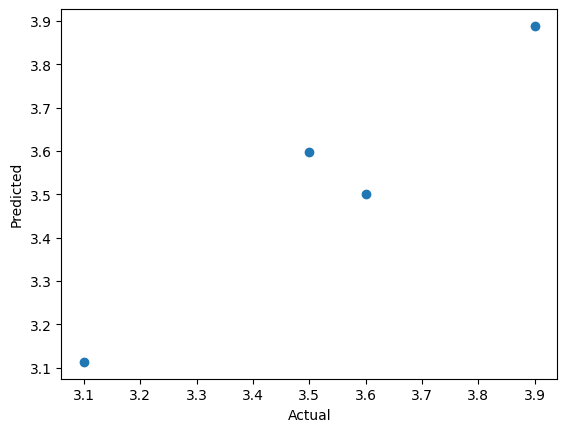

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.9398636443097724

In [27]:
y_pred_test = lr.predict(x_test)

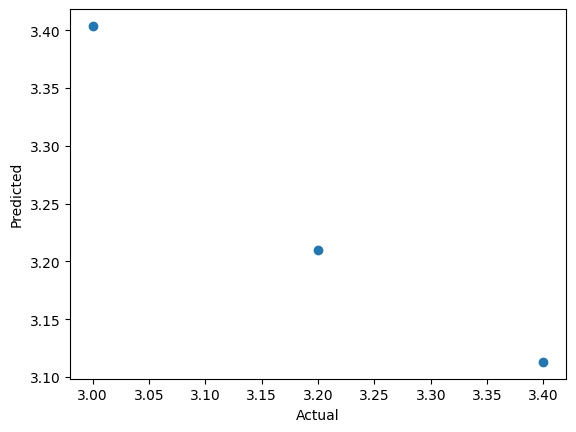

In [28]:
#import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
r2_score(y_test,y_pred_test)

-2.069357846279356